In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [9]:
data = pd.read_csv('Dataset.csv')
data['value'] = data['sentiment'].map({'positive': 1, 'negative': 0})

data = data.drop(['sentiment'],axis=1)

print(data.head())

                                              review  value
0  One of the other reviewers has mentioned that ...      1
1  A wonderful little production. <br /><br />The...      1
2  I thought this was a wonderful way to spend ti...      1
3  Basically there's a family where a little boy ...      0
4  Petter Mattei's "Love in the Time of Money" is...      1


In [10]:
p = data.head(25000)
p.head()

,review,value
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [11]:
X = p.review
y = p.value

In [12]:
def drawrocRF(y_test, y_pred):
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    print("Drawing")
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='RF AUC = %0.2f' % roc_auc, color='g')
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-0.1, 1.2])
    plt.ylim([-0.1, 1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
random_forest = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('Random', RandomForestClassifier(random_state=1))])
random_forest = random_forest.fit(X_train, y_train)
ypred = random_forest.predict(X_test)
print("random forest metrics")
print(metrics.accuracy_score(y_test, ypred))
print(metrics.classification_report(y_test, ypred))


random forest metrics
0.7488
             precision    recall  f1-score   support

          0       0.72      0.82      0.77      3785
          1       0.79      0.67      0.73      3715

avg / total       0.75      0.75      0.75      7500



Drawing


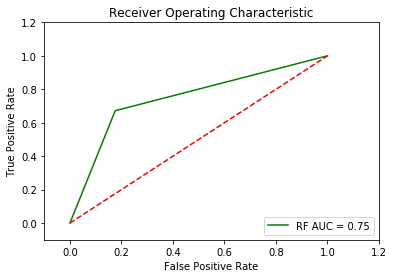

In [14]:
drawrocRF(y_test, ypred)